# Candidate Test 2022 Analysis Part 2

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2). Consider normalizing the data or performing similar scaling transformations as needed.

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:

- An analysis/description of which questions are most crucial concerning their placement on the axes.
- Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.
- A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**
- An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.
- Feel free to explore further and remember that preprocessing, methodology, and evaluation metrics are not mentioned explicitly, but are implicitly assumed.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
plt.rcParams['image.cmap'] = "gray"

C:\Users\maxsz\AppData\Local\Temp\ipykernel_22680\3295148219.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Let's start our analysis by scaling the data using StandardScaler so that it can be used for Principal Component Analysis. We will choose to go with 10 components at the beginning and then we will figure out if we need less by looking at the elbow chart and by printing out the explained variance ratio.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_excel('alldata.xlsx')
df = df.dropna()
labels = df['parti']
firstComponentQuestions = df.drop(columns=['storkreds', 'alder', 'navn', 'parti'])

scaler = StandardScaler()
scaler.fit(df)
X_scaled= scaler.transform(df)

# We choose ten components, but we will adjust that later in the process
pca = PCA(n_components = 10)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))


ValueError: could not convert string to float: 'Lars Philipsen Prahm'

As you can see the data still has 867 rows, but it now has only 10 feautres which were created by the PCA.

In [ ]:
import numpy
print(f"The ratio of 10 components: {[round(x, 4) for x in pca.explained_variance_ratio_]}")
print(f"This is how much information is explained in those ten components: {round(numpy.sum(pca.explained_variance_ratio_),4)}")

The ratio of 10 components: [0.4174, 0.1026, 0.0498, 0.043, 0.0293, 0.0237, 0.0199, 0.0169, 0.0167, 0.016]
This is how much information is explained in those ten components: 0.7354


Hmm 73% variance explained in 10 components, that's pretty good result considering that we started with 49 features. Let's have a look at the elbow plot to show that in a different way.

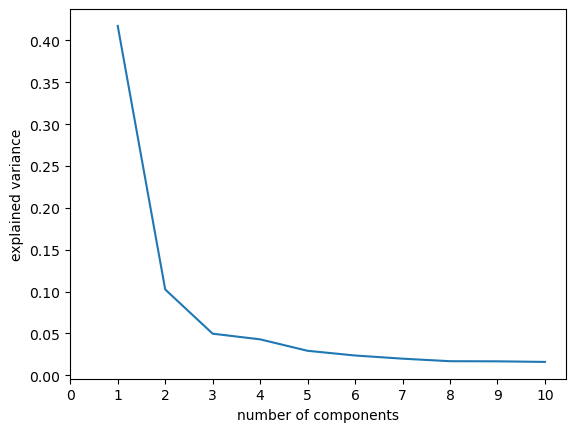

In [ ]:
plt.plot(list(range(1, 1 + len(pca.explained_variance_ratio_))), pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.xticks(np.arange(0, 1 + len(pca.explained_variance_ratio_), step=1))
plt.show()

Oh okay, that's look interesting. One can clearly see that the first three components are rather vertical than horizontal, thus they give a lot of value by explaining the variance of the dataset - and as we know variance equals information! We can also see that from 4th component the curve is becoming horizontal so the components do not bring much value. We could try to include only three components, let's see what will be the explained variance ratio for those.

In [ ]:
import numpy
pca3 = PCA(n_components = 3)
pca3.fit(X_scaled)
X_pca3 = pca3.transform(X_scaled)
print(f"The ratio of 3 components: {[round(x, 4) for x in pca3.explained_variance_ratio_]}")
print(f"This is how much information is explained in those three components: {round(numpy.sum(pca3.explained_variance_ratio_),4)}")


The ratio of 3 components: [0.4174, 0.1026, 0.0498]
This is how much information is explained in those three components: 0.5697


Well that's a lot of percent but we are also little bit far from the desired 70%. I suppose a better idea would be to include more components, like seven or so. In this case, we will go with 10 as we are not using this on any models. However, if we were to use this on a model, we would definitely try out different number of components to see how it affects my model. Let's say we would start by taking 5 components which explain 70% of the data and see how the model performs. Later we would take 15 components which explain 90% and see if the model slows down or if it is overfitting.

Now we will try to understand what do the first and the second component mean. We will try to find which features from the initial dataset have contributed the most to those components. Moreover, we will try to figure out if they are concering a similar area. Later we will compare that to the political compass - a way to rate political ideology in a spectrum with two axes: one about economic policy and another about social policy. 

In [ ]:
components = pca.components_
explained_variance = pca.explained_variance_
feature_names = df.columns

# Print the contribution of each feature to the components
important_features = []
num_features = X_scaled.shape[1]
for i in range(2):
    print(f"Principal Component {i+1}:")
    component_features = [(feature_names[j], components[i][j]) for j in range(num_features)]
    component_features.sort(key=lambda x: abs(x[1]), reverse=True)
    top_5_features = component_features[:5]
    important_features.append(top_5_features)
    for feature, coefficient in top_5_features:
        print(f"{feature}: {coefficient}")


Principal Component 1:
530: -0.19064057165736892
537: 0.19028423253957694
4a: -0.18884915210395284
3b: -0.18877782945374091
550: -0.18855512478366523
Principal Component 2:
10b: 0.3029172768119701
556: -0.2979777451908913
551: 0.2938356874232328
553: 0.27280742404917246
4b: 0.2584494471442466


### Principal Component 1
**Question ID: 530**
**Title:** CLIMATE AND ENERGY
**Description:** Should Denmark prioritize funding for public transportation over new highway construction to address environmental concerns and enhance accessibility?

**Question ID: 537**
**Title:** WELFARE
**Description:** Is it acceptable for economic inequality to increase if the general wealth of Danes also rises?

**Question ID: 4a**
**Title:** Economy
**Description:** Should economic inequality in Danish society be reduced?

**Question ID: 3b**
**Title:** Foreign and Defense Policy
**Description:** Should Denmark increase its foreign aid budget?

**Question ID: 550**
**Title:** LABOR MARKET AND ECONOMY
**Description:** Should there be quotas ensuring at least 30% female representation on company boards?

### Principal Component 2

**Question ID: 10b**
**Title:** Social Area
**Description:** Should the "Arne pension" allowing for early retirement be maintained despite labor shortages?

**Question ID: 556**
**Title:** LABOR MARKET AND ECONOMY
**Description:** Should the "Arne pension" be abolished due to its high cost and lack of targeted effectiveness?

**Question ID: 551**
**Title:** EU AND FOREIGN AFFAIRS
**Description:** Should Denmark implement permanent border controls with Germany, potentially impacting Schengen Area commitments?

**Question ID: 553**
**Title:** EDUCATION
**Description:** Should educational opportunities be decentralized from major cities to smaller towns to avoid depopulation?

**Question ID: 4b**
**Title:** Economy
**Description:** Should the state increase compensation to Danes for the rising costs due to inflation?

The most influencial questions in PCA are centered around topics such as:
- Economic Policy and Social Inequality:
economic compensations and retirement policies, accepting rising inequality with increasing general wealth

- Resource allocation: goverment investment decisions (public vs private) such as road contruction vs public transportation as well as placement of educational facilities

-  Social equity: incresing diversity in corporate environment 

- National priorities vs global responsibilities: how Denmark manages its own interest in relation to matters like foreign support or border control.

In [3]:
import pandas as pd
df1 = pd.read_excel('alldata.xlsx')
# let's create two lists containing the questions IDs corresponding to PC1 and PC2
# creating a df 'relevant data' containing party name and both PC1 and PC2 questions.
questions_pc1 = ['530', '537', '4a', '3b', '550']
questions_pc2 = ['10b', '556', '551', '553', '4b']
relevant_questions = questions_pc1 + questions_pc2
relevant_data = df1[['parti'] + relevant_questions]

# calculating the average response for each PC questions. 
average_positions_pc1 = relevant_data.groupby('parti')[questions_pc1].mean()
average_positions_pc2 = relevant_data.groupby('parti')[questions_pc2].mean()

average_positions_pc1, average_positions_pc2


(                                                  530       537        4a  \
 parti                                                                       
 Alternativet                                 1.880597 -1.641791  1.746269   
 Danmarksdemokraterne                        -0.837838  0.189189  0.108108   
 Dansk Folkeparti                            -0.571429  0.000000  0.448980   
 Det Konservative Folkeparti                 -0.836735  1.408163 -0.948980   
 Enhedslisten                                 1.959459 -1.878378  2.000000   
 Frie Grønne, Danmarks Nye Venstrefløjsparti  1.923077 -2.000000  2.000000   
 Kristendemokraterne                          0.880952 -0.428571  0.738095   
 Liberal Alliance                            -1.142857  1.900000 -1.628571   
 Løsgænger                                    0.000000  0.666667  0.666667   
 Moderaterne                                  0.642857  0.619048  0.095238   
 Nye Borgerlige                              -1.098039  1.705882

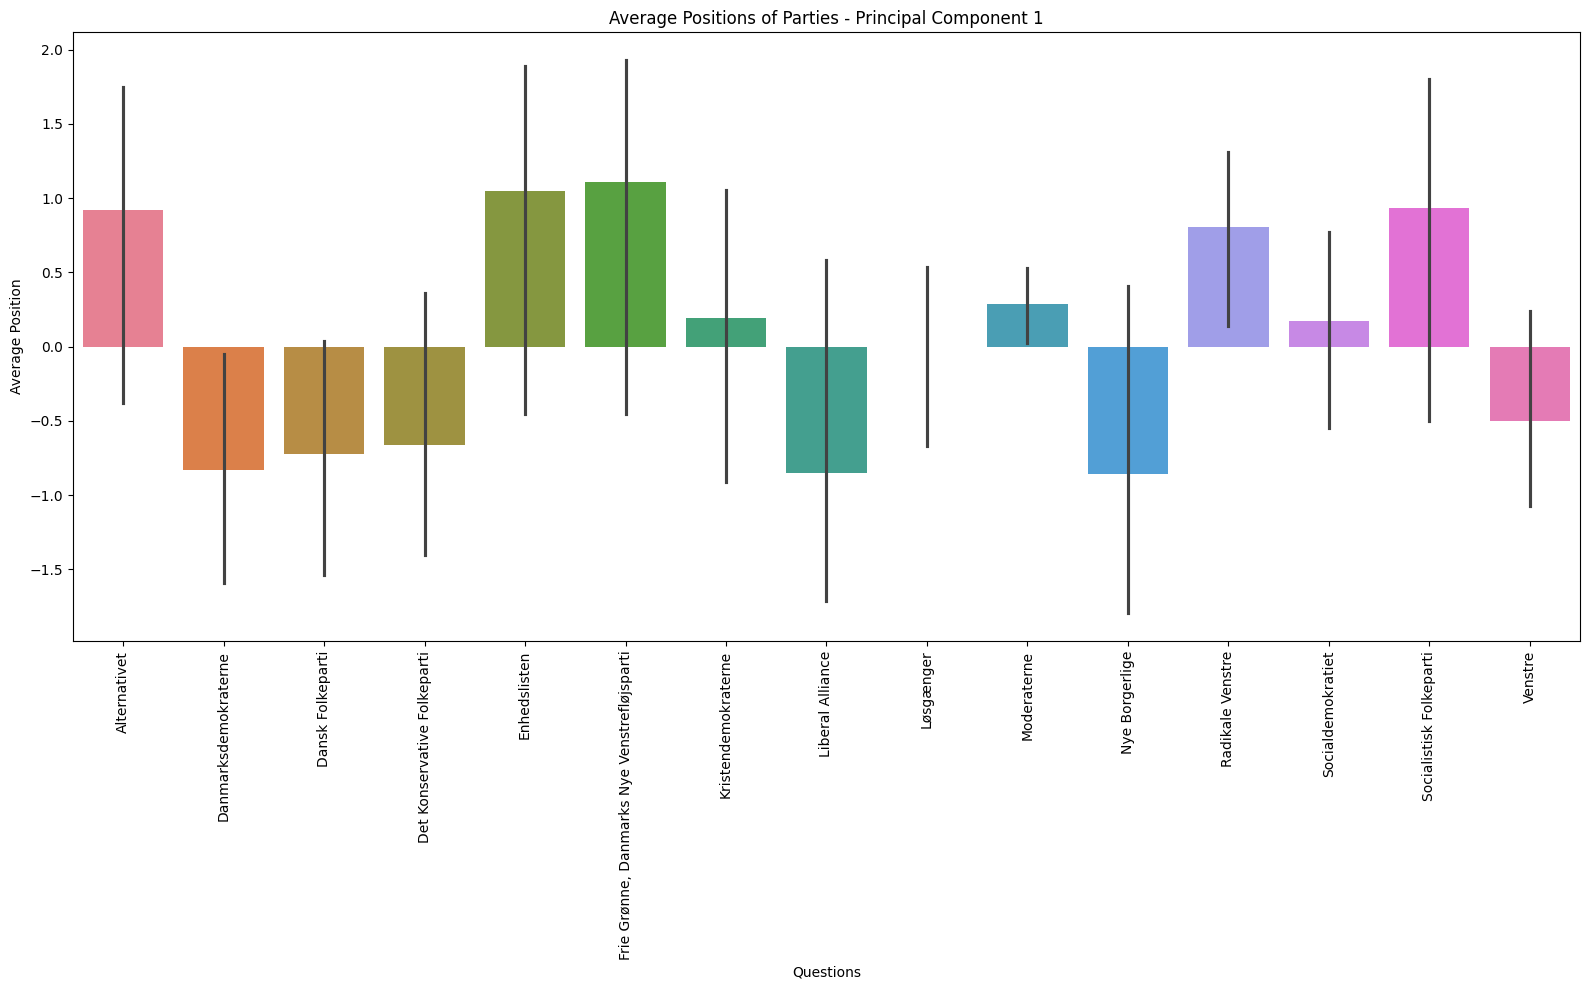

In [5]:
import seaborn as sns
# creating a function plot_average_positions that takes questions data and plots it with a title
def plot_average_positions(question_data, title):
    plt.figure(figsize=(16, 10))
    sns.barplot(data=question_data.T)
    plt.title(title)
    plt.ylabel('Average Position')
    plt.xlabel('Questions')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# plotting for PC1 data
plot_average_positions(average_positions_pc1, 'Average Positions of Parties - Principal Component 1')

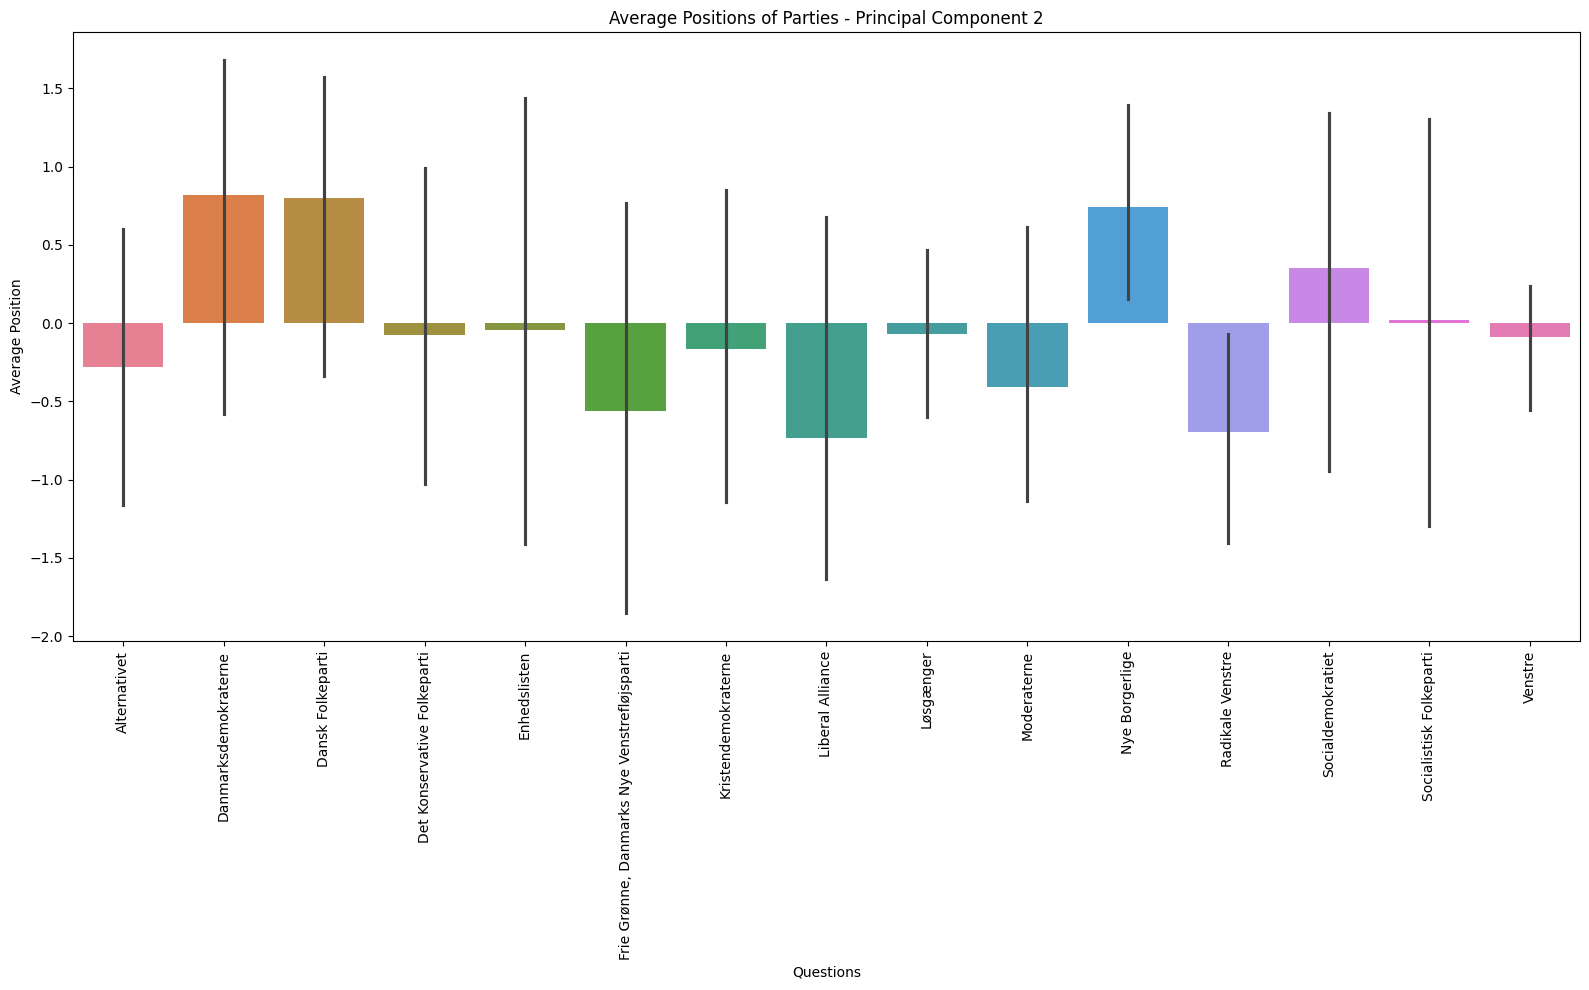

In [6]:
# plotting for PC2 data
plot_average_positions(average_positions_pc2, 'Average Positions of Parties - Principal Component 2')

We have managed to graph how  danish parties answers to important questions, grouped by performing PCA analysis and determining two most important componetns PC1 and PC2. These graphs show average opinions of the parties that might help to understand deeper the view of each party. 

However, it is crucial to note that each PC1 and PC2 combines several issues. foe example PC1: environment, economic inequality, foreighn aid
PC2: retirement, border control, education

therefore, it will be beneficial to take a more detailed look at the average response of the party with respect to a certain questions. that is why, every person can analyze each statement:

C:\Users\maxsz\AppData\Local\Temp\ipykernel_22680\2165313071.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=relevant_data.groupby('parti')[question_id].mean().reset_index(), x='parti', y=question_id, palette=palette)
C:\Users\maxsz\AppData\Local\Temp\ipykernel_22680\2165313071.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=relevant_data.groupby('parti')[question_id].mean().reset_index(), x='parti', y=question_id, palette=palette)
C:\Users\maxsz\AppData\Local\Temp\ipykernel_22680\2165313071.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False`

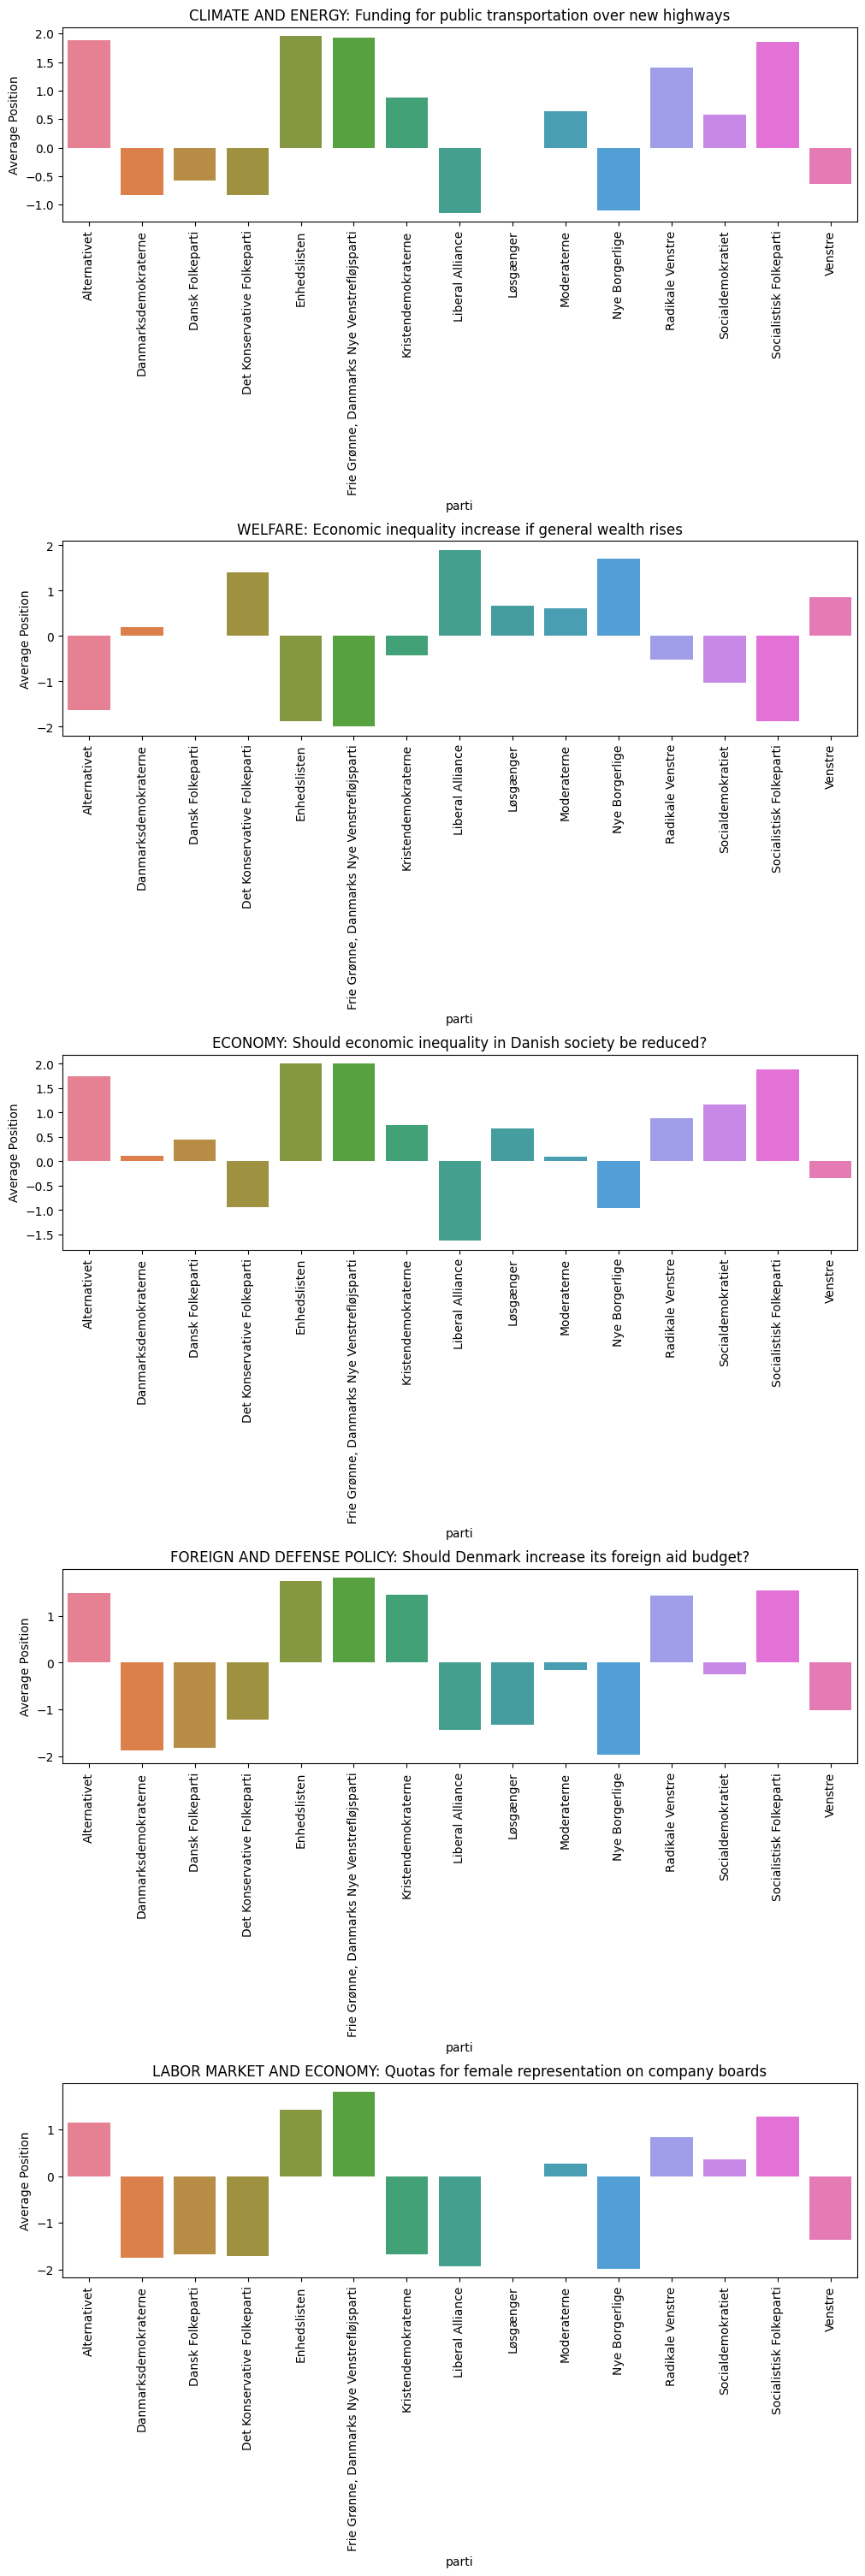

C:\Users\maxsz\AppData\Local\Temp\ipykernel_22680\2165313071.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=relevant_data.groupby('parti')[question_id].mean().reset_index(), x='parti', y=question_id, palette=palette)
C:\Users\maxsz\AppData\Local\Temp\ipykernel_22680\2165313071.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, data=relevant_data.groupby('parti')[question_id].mean().reset_index(), x='parti', y=question_id, palette=palette)
C:\Users\maxsz\AppData\Local\Temp\ipykernel_22680\2165313071.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False`

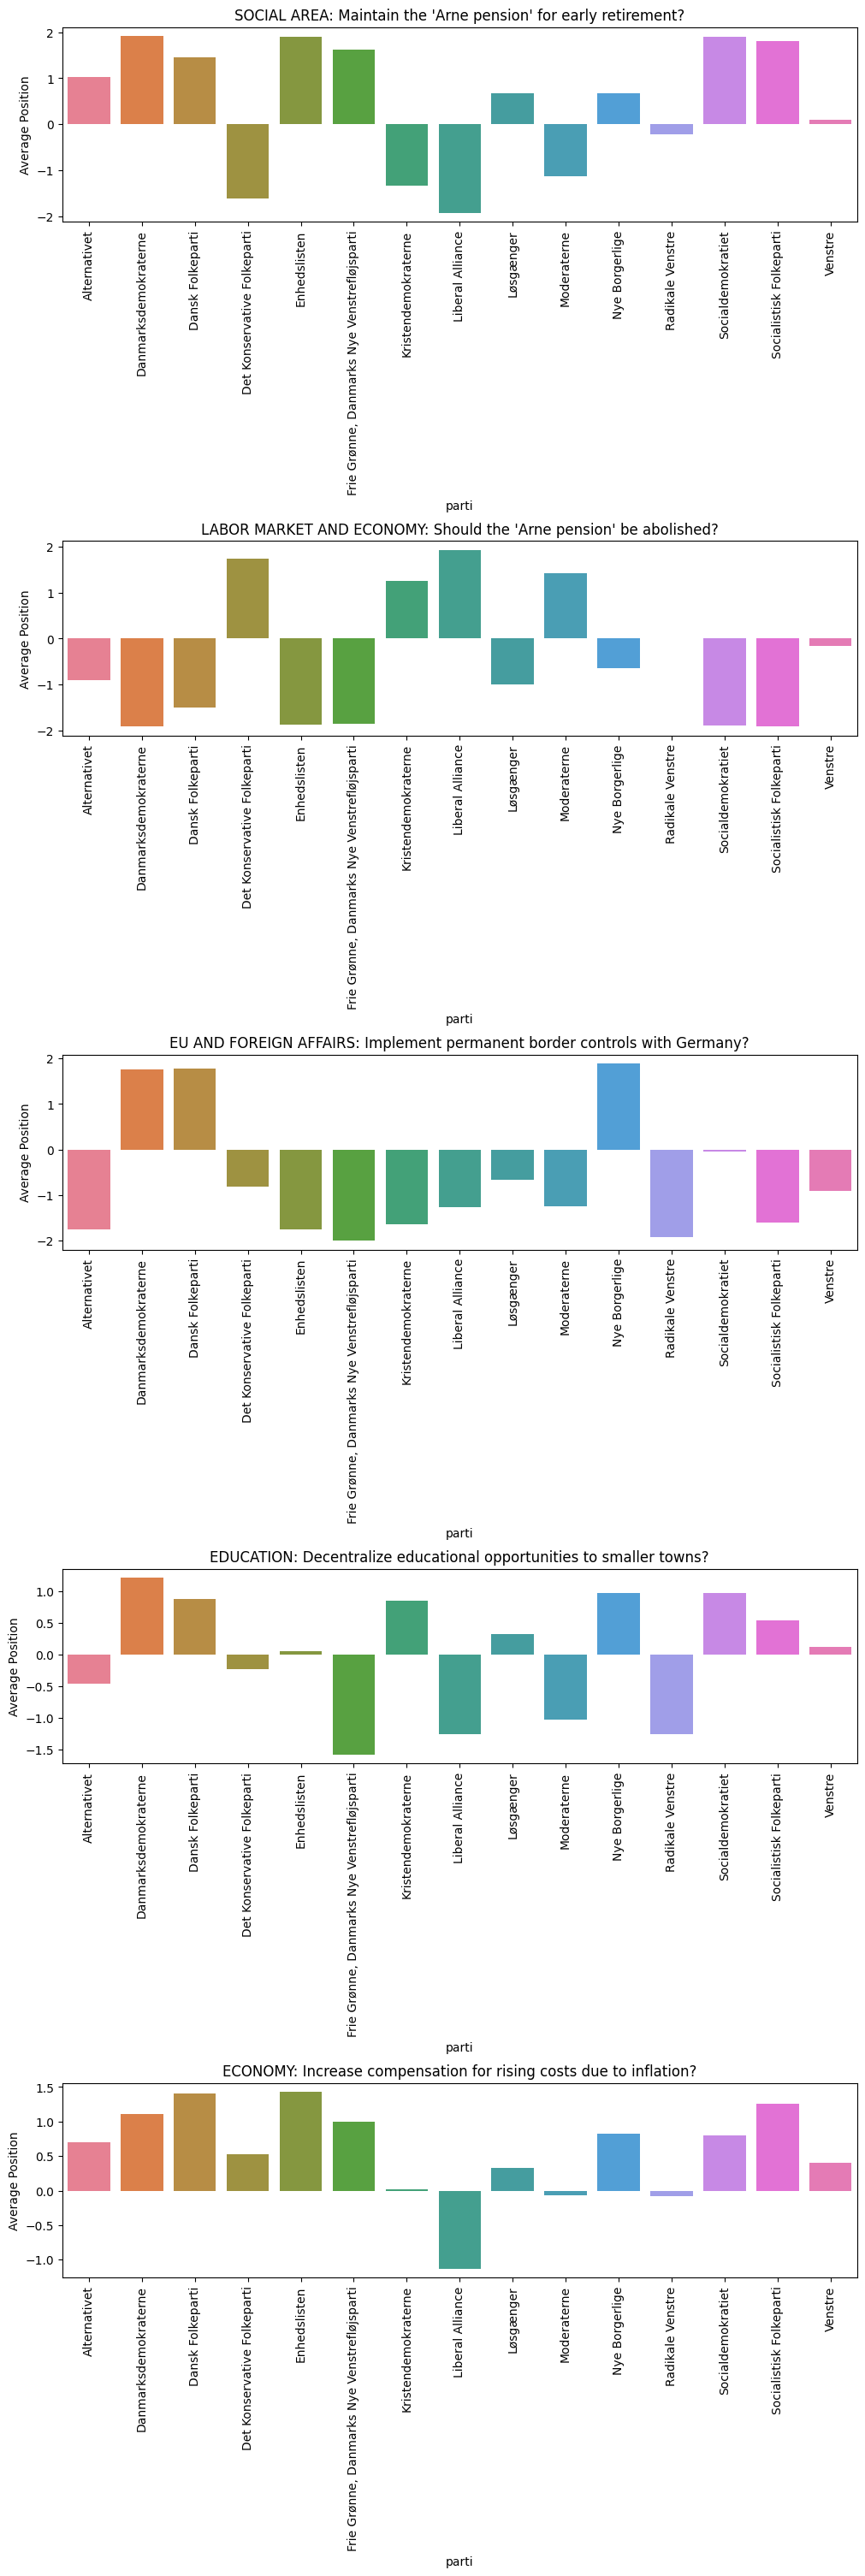

In [11]:
# we want to have 5 rows and 1 column graphs
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 30), constrained_layout=True)

#this palette will make the graph more diversed in terms of colors in comparison with default sns tone.
palette = sns.color_palette("husl", len(relevant_data['parti'].unique()))

# titles and questions strings for the graph ( PC1 )
titles_pc1 = [
    "CLIMATE AND ENERGY: Funding for public transportation over new highways",
    "WELFARE: Economic inequality increase if general wealth rises",
    "ECONOMY: Should economic inequality in Danish society be reduced?",
    "FOREIGN AND DEFENSE POLICY: Should Denmark increase its foreign aid budget?",
    "LABOR MARKET AND ECONOMY: Quotas for female representation on company boards"
]

# plotting the graphs
for ax, question_id, title in zip(axes.flat, questions_pc1, titles_pc1):
    sns.barplot(ax=ax, data=relevant_data.groupby('parti')[question_id].mean().reset_index(), x='parti', y=question_id, palette=palette)
    ax.set_title(title)
    ax.set_ylabel('Average Position')
    #ax.set_xlabel('Party')
    ax.tick_params(axis='x', rotation=90)

plt.show()

# again, we want to have 5 rows and 1 column graphs
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 30), constrained_layout=True)

# titles and questions strings for the graph ( PC2 )
titles_pc2 = [
    "SOCIAL AREA: Maintain the 'Arne pension' for early retirement?",
    "LABOR MARKET AND ECONOMY: Should the 'Arne pension' be abolished?",
    "EU AND FOREIGN AFFAIRS: Implement permanent border controls with Germany?",
    "EDUCATION: Decentralize educational opportunities to smaller towns?",
    "ECONOMY: Increase compensation for rising costs due to inflation?"
]

# plotting the graphs
for ax, question_id, title in zip(axes.flat, questions_pc2, titles_pc2):
    sns.barplot(ax=ax, data=relevant_data.groupby('parti')[question_id].mean().reset_index(), x='parti', y=question_id, palette=palette)
    ax.set_title(title)
    ax.set_ylabel('Average Position')
    #ax.set_xlabel('Party')
    ax.tick_params(axis='x', rotation=90)

plt.show()

Wow that looks interesting! Now we have the first five questions that had the highest impact on components. Let's see what are thos questions.

In [ ]:
drq = pd.read_excel('drq.xlsx')
tv2q = pd.read_excel('tv2q.xlsx')

q530 = drq.loc[drq['ID']==530]
q537 = drq.loc[drq['ID']==537]
q550 = drq.loc[drq['ID']==550]
q4a = tv2q.loc[tv2q['id']=='4a']
q3b = tv2q.loc[tv2q['id']=='3b']

firstComponentQuestions = pd.DataFrame({
    "ID":[q530['ID'].iloc[0], q537['ID'].iloc[0], q4a['id'].iloc[0], q3b['id'].iloc[0], q550['ID'].iloc[0]],
    "Area": [q530['Title'].iloc[0], q537['Title'].iloc[0], q4a['header'].iloc[0], q3b['header'].iloc[0], q550['Title'].iloc[0]],
    "Question" : [q530['Question'].iloc[0], q537['Question'].iloc[0], q4a['question'].iloc[0], q3b['question'].iloc[0], q550['Question'].iloc[0]]
})
pd.set_option('display.max_colwidth', None)     
firstComponentQuestions.head() 

,ID,Area,Question
0,530,KLIMA OG ENERGI,Danmark skal bruge flere penge på at styrke tog- og busdrift frem for at bygge nye motorveje
1,537,VELFÆRD,"Det er okay, at den økonomiske ulighed stiger, så længe danskerne generelt bliver rigere"
2,4a,Økonomi,Den økonomiske ulighed i det danske samfund bør mindskes.
3,3b,Udenrigs- og forsvarspolitik,Ulandsbistanden bør hæves.
4,550,ARBEJDSMARKED OG ØKONOMI,"Der skal indføres kvoter, der sikrer mindst 30 procent kvinder i virksomheders bestyrelser"


530: Denmark must spend more money on strengthening train and bus operations rather than building new motorways.     
537: It is okay for economic inequality to increase as long as the Danes generally become richer.    
4a: The economic inequality in Danish society should be reduced.    
3b: Development aid should be increased.    
550: Quotas must be introduced to ensure at least 30 percent women on company boards.     
  
We can clearly see that those question are mostly regarding economics, development and welfare of the Danes. We believe that it fits with the first political compass axes which is also economics. Let's take a look at the second component.

In [ ]:
q556 = drq.loc[drq['ID']==556]
q551 = drq.loc[drq['ID']==551]
q553 = drq.loc[drq['ID']==553]
q10b = tv2q.loc[tv2q['id']=='10b']
q4b = tv2q.loc[tv2q['id']=='4b']

firstComponentQuestions = pd.DataFrame({
    "ID":[q556['ID'].iloc[0], q551['ID'].iloc[0], q10b['id'].iloc[0], q4b['id'].iloc[0], q553['ID'].iloc[0]],
    "Area": [q556['Title'].iloc[0], q551['Title'].iloc[0], q10b['header'].iloc[0], q4b['header'].iloc[0], q553['Title'].iloc[0]],
    "Question" : [q556['Question'].iloc[0], q551['Question'].iloc[0], q10b['question'].iloc[0], q4b['question'].iloc[0], q553['Question'].iloc[0]]
})
pd.set_option('display.max_colwidth', None)     
firstComponentQuestions.head() 

,ID,Area,Question
0,556,ARBEJDSMARKED OG ØKONOMI,Den såkaldte Arne-pension skal afskaffes
1,551,EU OG UDENRIGS,Der skal være permanent grænsekontrol mellem Danmark og Tyskland
2,10b,Socialområdet,"Den såkaldte Arne-pension, der giver mulighed for tidligere pension, skal bibeholdes, selvom der er mangel på arbejdskraft."
3,4b,Økonomi,"Staten bør i højere grad kompensere danskerne for de stigende priser, som inflationen har medført."
4,553,UDDANNELSE,Der skal udflyttes flere uddannelsespladser fra de store byer


556: The so-called Arne pension must be abolished.     
551: There must be permanent border control between Denmark and Germany.            
10b: The so-called Arne pension, which allows for earlier retirement, must be maintained, even if there is a shortage of labour.         
4b: The state should compensate the Danes to a greater extent for the rising prices that inflation has brought about.       
553: More education places must be relocated from the big cities.         

We believe that those questions cover a wide range of social aspects of the Danish community. Therefore, we also think that it fits perfectly with the second axes from the political compass which is social policy. 

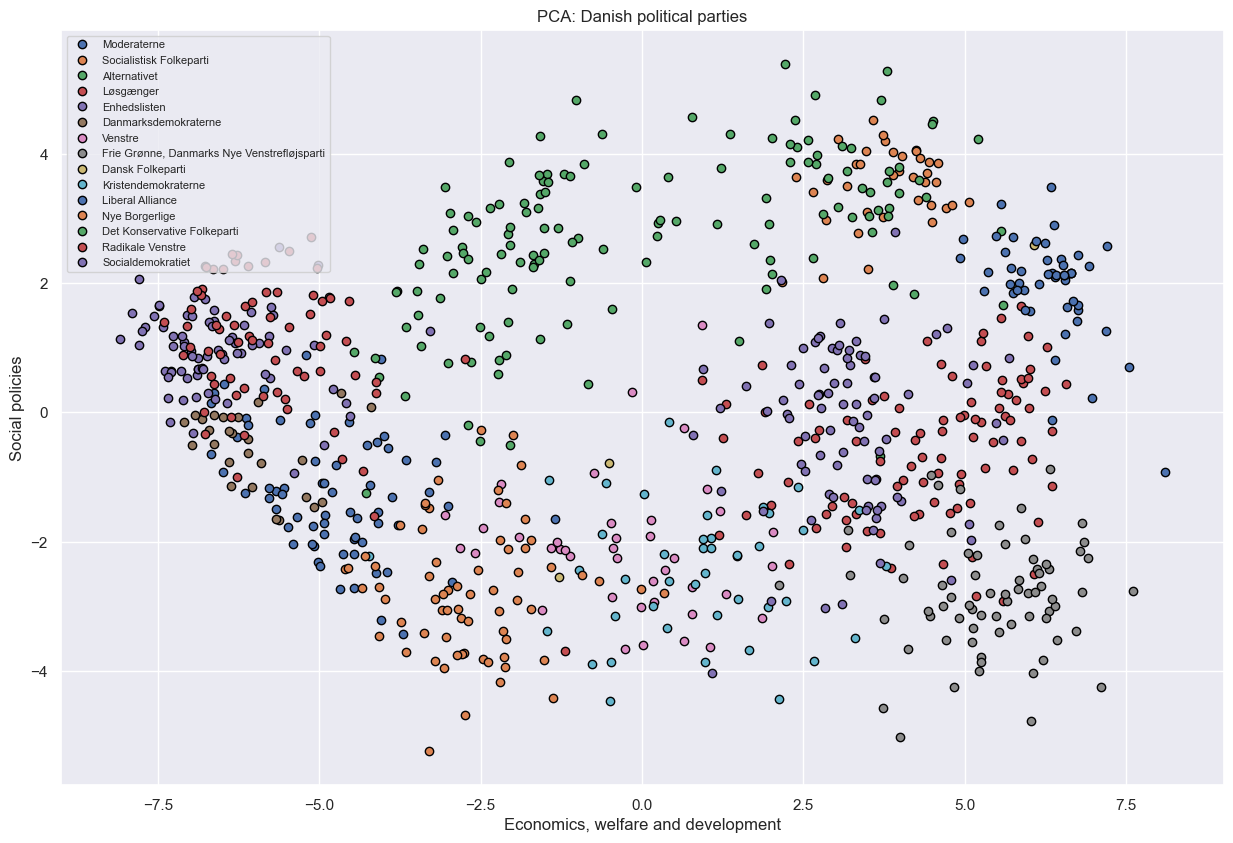

In [ ]:
# plt.figure(figsize=(16, 12))
# mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], labels, markeredgewidth=1)
# plt.legend(labels.unique(), loc="upper left", fontsize=8)
# plt.gca().set_aspect("equal")
# plt.xlabel("Economics, welfare and development")
# plt.ylabel("Social policies")
# plt.title("PCA: Danish political parties")
# plt.grid(True)
# plt.show()
# box_colors = ['forestgreen', 'lightskyblue', 'gold', 'yellowgreen', 'orange', 'springgreen', 'lightgray','turquoise', 'black', 'slateblue', 'teal','purple', 'red',  'deeppink']
# unique_labels_sorted = sorted(labels.unique())

#mglearn can't set colors of markers and other solutions didn't work so seemlessly

plt.figure(figsize=(15, 12))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], labels, s=6, markers='o')
plt.legend(labels.unique(), loc="upper left", fontsize=8)  # Smaller legend font size
plt.gca().set_aspect("equal")
plt.xlabel("Economics, welfare and development")
plt.ylabel("Social policies")
plt.title("PCA: Danish political parties")
plt.grid(True)
plt.show()



That is interesting! Parties such as Enhedslisten and Radikale Venstre which are left wing parties are indeed on the left side of the plot. Liberal Alliance which is considered to be a right wing party is on the right side of the plot as it alings nicely with their economic point of view. Nye Borgerlige considered to be far-right are on the right side of the plot. We believe that this plot aligns nicely with the political compass and it also shows the beliefs of each party are correctly visualized on the graph. Maybe it could hint that there are too many parties in left wing as well as in the right wing as it is pretty crowded there meaning that the candidates share similiar opinions while being in different parties. Let's see what our next step which is clustering will tell us!

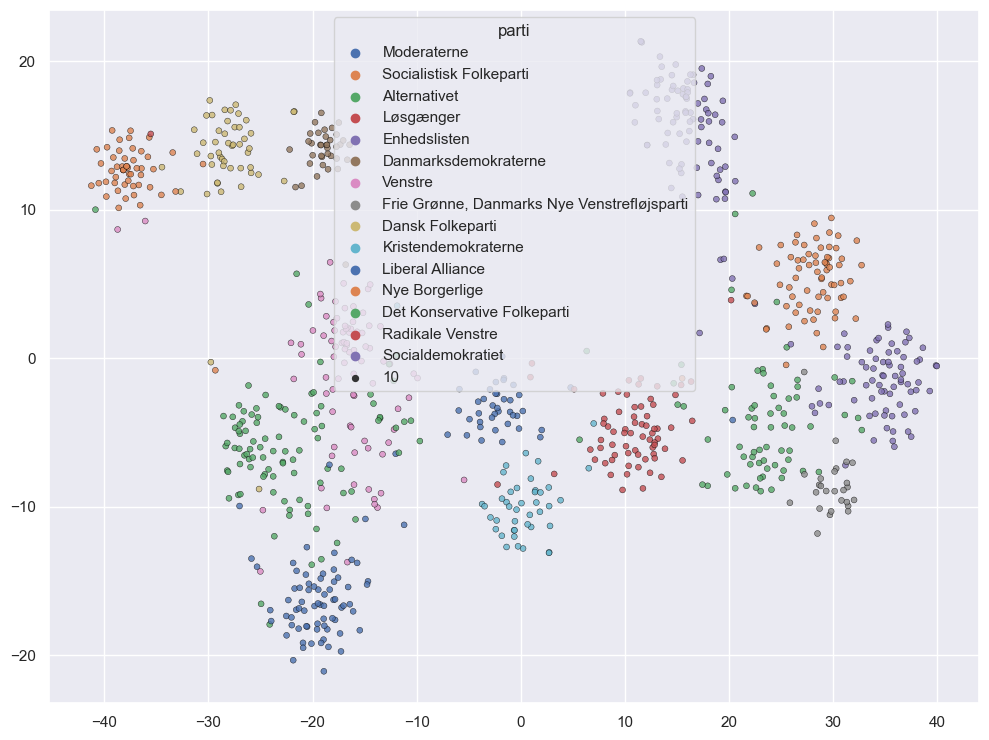

In [ ]:
from matplotlib import colors
import seaborn as sns
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=30, random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
politcal_tsne = tsne.fit_transform(df)
# box_colors = ['forestgreen', 'lightskyblue', 'gold', 'yellowgreen', 'orange', 'springgreen', 'lightgray','turquoise', 'black', 'slateblue', 'teal','purple', 'red',  'deeppink']

def visualize_2d(x, labels):
    sns.set_theme(rc={'figure.figsize':(12,9)})
    sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=labels, palette='deep', s=100, alpha=0.8, edgecolor="black", size=10, )
    
visualize_2d(politcal_tsne, labels)

Here is TSNE as a fun fact. It does a great work in visualizing the parties and their candidates in their groups.

Lets's take a look at the disagreements within the elected candidates. For that I will reuse the method from the first assignment on the candidates. This method calculates the distances between each candidates.

In [ ]:
elected_df = pd.read_excel('electeddata.xlsx')
data_only_questions_and_parti = elected_df.drop(['navn', 'alder', 'storkreds'], axis=1)
data3 = data_only_questions_and_parti.drop(['parti'], axis=1)

total_differences = []

# This function calculates differences between each of the candidates (1st to 2nd, 1st to 3rd... etc.)           
def differenceCalculator(data):
    n = len(data)
    # Pre-calculate properties to avoid repeated function calls
    properties = {'navn': elected_df['navn'], 'parti': elected_df['parti']}
    
    for i in range(n):
        person1 = data.iloc[i]
        name1, party1 = properties['navn'][i], properties['parti'][i]
        for j in range(i + 1, n):
            person2 = data.iloc[j]
            name2, party2 = properties['navn'][j], properties['parti'][j]
            # In this line we subtract each question and then sum those differences
            # absoluteValue of (-1-2) = 3 and so on... (don't agree - strongly agree)
            difference = abs(person1 - person2).sum() 
            total_differences.append((i, j, name1, name2, party1, party2, difference))
    return total_differences

differenceCalculator(data3)

# Convert the list of differences to DataFrame
differences_df = pd.DataFrame(total_differences, columns=['id1', 'id2','candidate1','candidate2', 'parti1', 'parti2', 'totalDifference'])


Okay, now let's consider the interparty disagreements.

In [ ]:
differences_df.sort_values(by='totalDifference', ascending=False).head(10)

,id1,id2,candidate1,candidate2,parti1,parti2,totalDifference
6651,45,127,Peder Hvelplund,Sandra Elisabeth Skalvig,Enhedslisten,Liberal Alliance,141
5356,35,107,Ole Birk Olesen,Karina Lorentzen Dehnhardt,Liberal Alliance,Socialistisk Folkeparti,140
6669,45,145,Peder Hvelplund,Steffen Frølund,Enhedslisten,Liberal Alliance,140
6630,45,106,Peder Hvelplund,Henrik Dahl,Enhedslisten,Liberal Alliance,140
2434,15,35,Charlotte Broman Mølbæk,Ole Birk Olesen,Socialistisk Folkeparti,Liberal Alliance,139
12324,107,127,Karina Lorentzen Dehnhardt,Sandra Elisabeth Skalvig,Socialistisk Folkeparti,Liberal Alliance,139
6684,45,160,Peder Hvelplund,Steffen Larsen,Enhedslisten,Liberal Alliance,139
6633,45,109,Peder Hvelplund,Niels Flemming Hansen,Enhedslisten,Det Konservative Folkeparti,138
6598,45,74,Peder Hvelplund,Mai Mercado,Enhedslisten,Det Konservative Folkeparti,138
5294,35,45,Ole Birk Olesen,Peder Hvelplund,Liberal Alliance,Enhedslisten,138


Peter Hvelplund seems to be a pearson that is the most disagreed with. This is also no surprise that the most conservative left wing party has a lot of dissagreements with right wing parties.

How about internal disagreements?

In [ ]:
diff_intra = differences_df[differences_df['parti1'] == differences_df['parti2']]
display(diff_intra.sort_values(by='totalDifference', ascending=False).head(10)) 

,id1,id2,candidate1,candidate2,parti1,parti2,totalDifference
6355,43,78,Mette Reissmann,Bjørn Brandenborg,Socialdemokratiet,Socialdemokratiet,77
5063,33,81,Jon Læssøe Stephensen,Jeppe Søe,Moderaterne,Moderaterne,70
6430,43,153,Mette Reissmann,Fie Thorsted Hækkerup,Socialdemokratiet,Socialdemokratiet,70
6410,43,133,Mette Reissmann,Frederik Vad,Socialdemokratiet,Socialdemokratiet,69
12839,116,138,Benny Engelbrecht,Mette Gjerskov,Socialdemokratiet,Socialdemokratiet,69
6338,43,61,Mette Reissmann,Simon Kollerup,Socialdemokratiet,Socialdemokratiet,68
5086,33,104,Jon Læssøe Stephensen,Henrik Frandsen,Moderaterne,Moderaterne,68
5107,33,125,Jon Læssøe Stephensen,Charlotte Bagge Hansen,Moderaterne,Moderaterne,67
12867,116,166,Benny Engelbrecht,Maria Durhuus,Socialdemokratiet,Socialdemokratiet,67
6517,44,116,Ida Margrete Meier Auken,Benny Engelbrecht,Socialdemokratiet,Socialdemokratiet,67


Metter Reissmann from Socialdemokratiet has a lot of dissagrements with various colleagues from her party. This is also the case for Jon Laessoee Stephensen in Moderaterne. Those two parties seems to have high degree of internal disagreements.

What about the candidates from different parties that agree the most?

In [ ]:
diff_inter = differences_df[differences_df['parti1'] != differences_df['parti2']]
display(diff_inter.sort_values(by='totalDifference', ascending=True).head(10)) 

,id1,id2,candidate1,candidate2,parti1,parti2,totalDifference
211,1,45,Torsten Gejl,Peder Hvelplund,Alternativet,Enhedslisten,15
4473,29,37,Pelle Dragsted,Carl Valentin,Enhedslisten,Socialistisk Folkeparti,19
44,0,45,Karsten Hønge,Peder Hvelplund,Socialistisk Folkeparti,Enhedslisten,19
5760,38,118,Lisbeth Bech-Nielsen,Trine Pertou Mach,Socialistisk Folkeparti,Enhedslisten,19
1,0,2,Karsten Hønge,Mai Villadsen,Socialistisk Folkeparti,Enhedslisten,19
369,2,37,Mai Villadsen,Carl Valentin,Enhedslisten,Socialistisk Folkeparti,20
493,2,161,Mai Villadsen,Sigurd Agersnap,Enhedslisten,Socialistisk Folkeparti,20
346,2,14,Mai Villadsen,Sofie Lippert,Enhedslisten,Socialistisk Folkeparti,20
370,2,38,Mai Villadsen,Lisbeth Bech-Nielsen,Enhedslisten,Socialistisk Folkeparti,20
94,0,95,Karsten Hønge,Søren Egge Rasmussen,Socialistisk Folkeparti,Enhedslisten,20


The left wing parties have the most in common, in particular Enhedslisten and Socialist Folkeparti. Mai Villadsen is a person that agrees with 5 candidates from Socialistisk Folkeparti. That could suggest that she might be in that party instead. If you take a look at the PCA plot it can also be seen there that those two parties have a lot in common.

And finally how about the highest degree of internal agreements?

In [ ]:
differences_df.sort_values(by='totalDifference', ascending=True).head(10)

,id1,id2,candidate1,candidate2,parti1,parti2,totalDifference
8924,65,150,Lea Wermelin,Rasmus Stoklund,Socialdemokratiet,Socialdemokratiet,1
12387,108,130,Pernille Vermund,Peter Seier Christensen,Nye Borgerlige,Nye Borgerlige,1
7829,55,130,Kim Edberg,Peter Seier Christensen,Nye Borgerlige,Nye Borgerlige,2
10349,80,150,Trine Bramsen,Rasmus Stoklund,Socialdemokratiet,Socialdemokratiet,2
7807,55,108,Kim Edberg,Pernille Vermund,Nye Borgerlige,Nye Borgerlige,3
8854,65,80,Lea Wermelin,Trine Bramsen,Socialdemokratiet,Socialdemokratiet,3
1142,6,156,Jakob Ellemann-Jensen,Karen Ellemann,Venstre,Venstre,3
13858,142,156,Sophie Løhde,Karen Ellemann,Venstre,Venstre,4
10848,86,142,Thomas Danielsen,Sophie Løhde,Venstre,Venstre,5
10862,86,156,Thomas Danielsen,Karen Ellemann,Venstre,Venstre,5


Those three parties seems to have the least internal disagreements. Candidates from venstre seems to agree a lot as well as candidates from Nye Borgerlige and Socialdemokratiet.